# Data Exploration

## Download Dataset

In [1]:
from datasets import load_dataset

In [2]:
images = load_dataset(
    'TREC-AToMiC/AToMiC-Images-v0.2',
    split='train',
    use_auth_token=True,
)

texts = load_dataset(
    'TREC-AToMiC/AToMiC-Texts-v0.2',
    split='train',
    use_auth_token=True,
)

Using custom data configuration TREC-AToMiC--AToMiC-Images-v0.2-275960c34975be87
Found cached dataset parquet (/store/scratch/j587yang/.cache/TREC-AToMiC___parquet/TREC-AToMiC--AToMiC-Images-v0.2-275960c34975be87/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Using custom data configuration TREC-AToMiC--AToMiC-Texts-v0.2-c23dbea006119e3e
Found cached dataset parquet (/store/scratch/j587yang/.cache/TREC-AToMiC___parquet/TREC-AToMiC--AToMiC-Texts-v0.2-c23dbea006119e3e/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


## Basic information

### Features & Number of examples

In [3]:
images

Dataset({
    features: ['image_url', 'image_id', 'language', 'caption_reference_description', 'caption_alt_text_description', 'caption_attribution_description', 'image'],
    num_rows: 11019202
})

In [4]:
texts

Dataset({
    features: ['text_id', 'page_url', 'page_title', 'section_title', 'context_page_description', 'context_section_description', 'media', 'hierachy', 'category', 'source_id'],
    num_rows: 10134744
})

## Browsing Data

### Index by row

In [5]:
images[9527]

{'image_url': 'https://upload.wikimedia.org/wikipedia/commons/0/00/Captain_John_L._Anderson.png',
 'image_id': 'b9519d35-c787-381d-9ecd-a5dd4fb319c9',
 'language': ['en'],
 'caption_reference_description': ['Captain John L. Anderson ca. 1928'],
 'caption_alt_text_description': [''],
 'caption_attribution_description': ['English: Portrait of Captain John L. Anderson'],
 'image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=256x375>}

### Check the image pixels

The images is saved as PIL object (WebP format), you can check the image easily

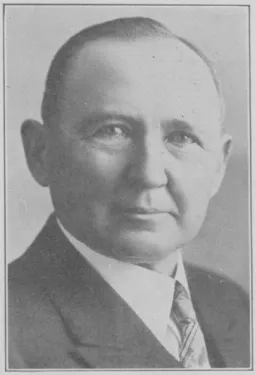

In [6]:
images[9527]['image']

### Search example by ID

To search example by ID (text_id or image_id), we need to build a id-to-row map first.

In [33]:
from tqdm.auto import tqdm

def getRowIdx(id_list: list) -> dict:
    id2pos = {}
    for pos, _id in tqdm(enumerate(id_list), total=len(id_list)):
        id2pos[_id] = pos
    return id2pos


image_ids = images.remove_columns(['image'])['image_id']
text_ids = texts['text_id']
image_id2row_dict = getRowIdx(image_ids)
text_id2row_dict = getRowIdx(text_ids)

  0%|          | 0/11019202 [00:00<?, ?it/s]

  0%|          | 0/10134744 [00:00<?, ?it/s]

In [34]:
images[image_id2row_dict['b9519d35-c787-381d-9ecd-a5dd4fb319c9']]

{'image_url': 'https://upload.wikimedia.org/wikipedia/commons/0/00/Captain_John_L._Anderson.png',
 'image_id': 'b9519d35-c787-381d-9ecd-a5dd4fb319c9',
 'language': ['en'],
 'caption_reference_description': ['Captain John L. Anderson ca. 1928'],
 'caption_alt_text_description': [''],
 'caption_attribution_description': ['English: Portrait of Captain John L. Anderson'],
 'image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=256x375>}

In [35]:
texts[text_id2row_dict['projected-08555460-002']]

{'text_id': 'projected-08555460-002',
 'page_url': 'https://en.wikipedia.org/wiki/Boeing%20EC-135',
 'page_title': 'Boeing EC-135',
 'section_title': 'Looking Glass',
 'context_page_description': 'The Boeing EC-135 is a retired family of  aircraft derived from the . During the , the EC-135 was best known for being modified to perform the  mission where one EC-135 was always airborne 24 hours a day to serve as flying command post for the  in the event of nuclear war. Various other EC-135 aircraft sat on airborne and ground alert throughout the Cold War, with the last EC-135C being retired in 1998. The EC-135N variant served as the tracking aircraft for the .\n\nThe Boeing E-6B "TACAMO" replaced the EC-135C.',
 'context_section_description': 'Officially known as "", at least 11 EC-135C command post aircraft were provided to the Commander in Chief,  (CINCSAC), and were based at various locations throughout the United States and worldwide. Operations began in 1961 with the  at , , initiall

## Optional: Check relevance labels (Qrels)

In [36]:
qrels = load_dataset(
    'TREC-AToMiC/AToMiC-Qrels-v0.2',
    split='train',
    use_auth_token=True,
)

Using custom data configuration TREC-AToMiC--AToMiC-Qrels-v0.2-f1634624281fffa7
Found cached dataset parquet (/store/scratch/j587yang/.cache/TREC-AToMiC___parquet/TREC-AToMiC--AToMiC-Qrels-v0.2-f1634624281fffa7/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [37]:
for idx, _id in enumerate(qrels['text_id']):
    if _id == 'projected-08555460-002':
        print(idx, text_id)

1212659 projected-08555460-002


In [38]:
for idx, _id in enumerate(qrels['image_id']):
    if _id == 'b9519d35-c787-381d-9ecd-a5dd4fb319c9':
        print(idx, _id)

2509545 b9519d35-c787-381d-9ecd-a5dd4fb319c9


In [39]:
qrels[1212659]

{'text_id': 'projected-08555460-002',
 'Q0': 'Q0',
 'image_id': 'eb8eee66-f930-31b2-899c-a34b2b78c599',
 'rel': 1}

In [40]:
texts[text_id2row_dict['projected-08555460-002']]

{'text_id': 'projected-08555460-002',
 'page_url': 'https://en.wikipedia.org/wiki/Boeing%20EC-135',
 'page_title': 'Boeing EC-135',
 'section_title': 'Looking Glass',
 'context_page_description': 'The Boeing EC-135 is a retired family of  aircraft derived from the . During the , the EC-135 was best known for being modified to perform the  mission where one EC-135 was always airborne 24 hours a day to serve as flying command post for the  in the event of nuclear war. Various other EC-135 aircraft sat on airborne and ground alert throughout the Cold War, with the last EC-135C being retired in 1998. The EC-135N variant served as the tracking aircraft for the .\n\nThe Boeing E-6B "TACAMO" replaced the EC-135C.',
 'context_section_description': 'Officially known as "", at least 11 EC-135C command post aircraft were provided to the Commander in Chief,  (CINCSAC), and were based at various locations throughout the United States and worldwide. Operations began in 1961 with the  at , , initiall

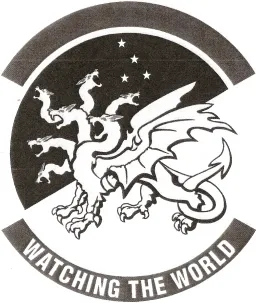

In [45]:
images[image_id2row_dict['eb8eee66-f930-31b2-899c-a34b2b78c599']]['image']

In [42]:
qrels[2509545]

{'text_id': 'projected-63384862-000',
 'Q0': 'Q0',
 'image_id': 'b9519d35-c787-381d-9ecd-a5dd4fb319c9',
 'rel': 1}

In [43]:
texts[text_id2row_dict['projected-63384862-000']]

{'text_id': 'projected-63384862-000',
 'page_url': 'https://en.wikipedia.org/wiki/John%20L.%20Anderson%20%28shipbuilder%29',
 'page_title': 'John L. Anderson (shipbuilder)',
 'section_title': 'Introduction',
 'context_page_description': '',
 'context_section_description': 'Captain John Laurentius Anderson was a preeminent figure in  maritime industries in the first half of the twentieth century, particularly ferry service, shipbuilding, and ship-based tourism.  He ran the largest ferry fleet on Lake Washington for three decades.  He ran a large ferry fleet in Puget Sound.  He built more than a dozen vessels at his shipyards, including the first ocean-going ship ever built on .',
 'media': [],
 'hierachy': ['Introduction'],
 'category': ['Steamboats of Lake Washington'],
 'source_id': 'wit-train-topic-004214217'}

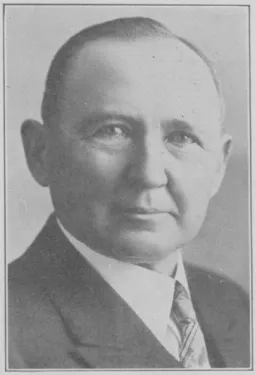

In [44]:
images[image_id2row_dict['b9519d35-c787-381d-9ecd-a5dd4fb319c9']]['image']